In [53]:
# @title Download TradeMaster Package
!git clone https://github.com/DVampire/TradeMasterReBuild.git

Cloning into 'TradeMasterReBuild'...
remote: Enumerating objects: 1327, done.
remote: Counting objects: 100% (422/422), done.
remote: Compressing objects: 100% (266/266), done.
remote: Total 1327 (delta 256), reused 280 (delta 144), pack-reused 905
Receiving objects: 100% (1327/1327), 97.37 MiB | 23.30 MiB/s, done.
Resolving deltas: 100% (664/664), done.
Updating files: 100% (401/401), done.


This tutorial is to demonstrate an example of using DeepScalper to do Algorithms Trading on the Bitcoin.

Download TradeMaster Package

In [ ]:
!git clone https://github.com/DVampire/TradeMasterReBuild.git

In [3]:
%cd '/content/TradeMasterReBuild'

/content/TradeMasterReBuild


Set up Experinment Environment

In [4]:
!pip install mmcv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.4/605.4 KB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 22.4 MB/s eta 0:00:00
  Created wheel for mmcv: filename=mmcv-1.7.1-py2.py3-none-any.whl size=930735 sha256=27f5ac99ded18bcae092e833034046296d5ce0c2a1a81103a5566f31bea2d522
  Stored in directory: /root/.cache/pip/wheels/74/0c/f4/cafa17bca99a907f0ea624325aec45e905dd44884a47eae0bf
Successfully built mmcv


In [5]:
!pip install iopath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 KB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31547 sha256=137854da8de17dee39928aa565122c0d6ff6c4a5ab0619059bc4306b9a3e1edd
  Stored in directory: /root/.cache/pip/wheels/89/3e/24/0f349c0b2eeb6965903035f3b00dbb5c9bea437b4a2f18d82c
Successfully built iopath


In [6]:
!pip install ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 41.7 MB/s eta 0:00:00


In [7]:
import os
import sys
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

ROOT = "/content/TradeMasterReBuild"
sys.path.append(ROOT)

import torch
import argparse
import os.path as osp
from mmcv import Config
from trademaster.utils import replace_cfg_vals
from trademaster.nets.builder import build_net
from trademaster.environments.builder import build_environment
from trademaster.datasets.builder import build_dataset
from trademaster.agents.builder import build_agent
from trademaster.optimizers.builder import build_optimizer
from trademaster.losses.builder import build_loss
from trademaster.trainers.builder import build_trainer

import sys
sys.argv=['']
del sys

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


Set up parameters

In [13]:
parser = argparse.ArgumentParser(description='Download Alpaca Datasets')
parser.add_argument("--config", default=osp.join(ROOT, "configs", "algorithmic_trading", "algorithmic_trading_BTC_dqn_dqn_adam_mse.py"),
                        help="download datasets config file path")
parser.add_argument("--task_name", type=str, default="train")
parser.add_argument("--test_style", type=str, default='-1')

args = parser.parse_args(args=['--task_name', 'train'])

Set up device(CPU or GPU)

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Load configuration file

In [15]:
cfg = Config.fromfile(args.config)
task_name = args.task_name

cfg = replace_cfg_vals(cfg)

cfg.data.update({'test_style': args.test_style})
print(cfg)

Config (path: /content/TradeMasterReBuild/configs/algorithmic_trading/algorithmic_trading_BTC_dqn_dqn_adam_mse.py): {'data': {'type': 'AlgorithmicTradingDataset', 'data_path': 'data/algorithmic_trading/BTC', 'train_path': 'data/algorithmic_trading/BTC/train.csv', 'valid_path': 'data/algorithmic_trading/BTC/valid.csv', 'test_path': 'data/algorithmic_trading/BTC/test.csv', 'test_style_path': 'data/algorithmic_trading/BTC/test_labeled_3_24_-0.15_0.15.csv', 'tech_indicator_list': ['high', 'low', 'open', 'close', 'adjcp', 'zopen', 'zhigh', 'zlow', 'zadjcp', 'zclose', 'zd_5', 'zd_10', 'zd_15', 'zd_20', 'zd_25', 'zd_30'], 'backward_num_day': 5, 'forward_num_day': 5, 'test_style': '-1'}, 'environment': {'type': 'AlgorithmicTradingEnvironment'}, 'agent': {'type': 'AlgorithmicTradingDQN', 'max_step': 12345, 'reward_scale': 1, 'repeat_times': 1, 'gamma': 0.9, 'batch_size': 64, 'clip_grad_norm': 3.0, 'soft_update_tau': 0, 'state_value_tau': 0.005}, 'trainer': {'type': 'AlgorithmicTradingTrainer', 

Build dataset

In [16]:
dataset = build_dataset(cfg)

Build enviroment

In [17]:
train_environment = build_environment(cfg, default_args=dict(dataset=dataset, task="train"))
valid_environment = build_environment(cfg, default_args=dict(dataset=dataset, task="valid"))
test_environment = build_environment(cfg, default_args=dict(dataset=dataset, task="test"))

if task_name.startswith("style_test"):
  test_style_environments = []
  for i, path in enumerate(dataset.test_style_paths):
    test_style_environments.append(build_environment(cfg, default_args=dict(dataset=dataset, task="test_style",style_test_path=path,task_index=i)))

Build Agent

In [20]:
    action_dim = train_environment.action_space.n
    state_dim = train_environment.observation_space.shape[0]

    cfg.act.update(dict(action_dim=action_dim, state_dim=state_dim))
    act = build_net(cfg.act)
    if cfg.cri:
        cfg.cri.update(dict(action_dim=action_dim, state_dim=state_dim))
        cri = build_net(cfg.cri)
    else:
        cri = None

    act_optimizer = build_optimizer(cfg, default_args=dict(params=act.parameters()))
    cri_optimizer = None
    criterion = build_loss(cfg)

    agent = build_agent(cfg, default_args=dict(action_dim = action_dim,
                           state_dim = state_dim,
                           act = act,
                           cri = cri,
                           act_optimizer=act_optimizer,
                           cri_optimizer=cri_optimizer,
                           criterion=criterion,
                           device=device))

Build Trainer

In [21]:
if task_name.startswith("style_test"):
    trainers = []
    for env in test_style_environments:
      trainers.append(build_trainer(cfg, default_args=dict(train_environment=train_environment,
                               valid_environment=valid_environment,
                               test_environment=env,
                               agent=agent,
                               device=device)))

else:
    trainer = build_trainer(cfg, default_args=dict(train_environment=train_environment,
                             valid_environment=valid_environment,
                             test_environment=test_environment,
                             agent=agent,
                             device=device))

cfg.dump(osp.join(trainer.work_dir, osp.basename(args.config)))


| Arguments Remove work_dir: /content/TradeMasterReBuild/work_dir/algorithmic_trading_BTC_dqn_dqn_adam_mse


Train and Valid

In [22]:
if task_name.startswith("train"):
    trainer.train_and_valid()
    print("train end")
elif task_name.startswith("test"):
    trainer.test()
    print("test end")
elif task_name.startswith("style_test"):
    daily_return_list = []
    for trainer in trainers:
        daily_return_list.extend(trainer.test())
    print('win rate is: ', sum(r > 0 for r in daily_return_list) / len(daily_return_list))
    print("style test end")

Train Episode: [1/20]
+---------------+-------------+-------------+--------------+----------------+---------------+
| Profit Margin | Sharp Ratio |  Volatility | Max Drawdown |  Calmar Ratio  | Sortino Ratio |
+---------------+-------------+-------------+--------------+----------------+---------------+
|  -330.788968% |  -0.000395  | 4673.598751 |   2.085304   | -102809.252114 |   -1.033315   |
+---------------+-------------+-------------+--------------+----------------+---------------+
Valid Episode: [1/20]
+---------------+-------------+------------+--------------+--------------+---------------+
| Profit Margin | Sharp Ratio | Volatility | Max Drawdown | Calmar Ratio | Sortino Ratio |
+---------------+-------------+------------+--------------+--------------+---------------+
|   -0.000000%  |   0.000000  |  0.000000  |   0.000000   |   0.000000   |      0nan     |
+---------------+-------------+------------+--------------+--------------+---------------+
Valid Episode Reward Sum: 0.000

Test


In [24]:
args = parser.parse_args(args=['--task_name', 'test'])
task_name = args.task_name

if task_name.startswith("train"):
    trainer.train_and_valid()
    print("train end")
elif task_name.startswith("test"):
    trainer.test()
    print("test end")
elif task_name.startswith("style_test"):
    daily_return_list = []
    for trainer in trainers:
        daily_return_list.extend(trainer.test())
    print('win rate is: ', sum(r > 0 for r in daily_return_list) / len(daily_return_list))
    print("style test end")

Resume checkpoint /content/TradeMasterReBuild/work_dir/algorithmic_trading_BTC_dqn_dqn_adam_mse/checkpoints/best.pth
Test Best Episode
+---------------+-------------+--------------+--------------+---------------+---------------+
| Profit Margin | Sharp Ratio |  Volatility  | Max Drawdown |  Calmar Ratio | Sortino Ratio |
+---------------+-------------+--------------+--------------+---------------+---------------+
|  -373.870296% |  -0.002974  | 13694.043365 |   5.949557   | -33632.934851 |   -1.186391   |
+---------------+-------------+--------------+--------------+---------------+---------------+
Test Best Episode Reward Sum: -402557.887550
test end


We have trained model on the train environment for 20 epochs, then when each epoch ends, we use the mdoel to do trading on the valid environment. We use Profit Margin as the indicator and choose the best model among 20 models in the valid environment and use the model to do trading in the test environment


Result Visualization

In [26]:
import pandas as pd
test_result=pd.read_csv("work_dir/algorithmic_trading_BTC_dqn_dqn_adam_mse/test_result.csv",index_col=0)
test_result.head(10)

,total assets
daily_return,
0.000000,100000.000000
-116.113553,78511.520052
-355.907811,56550.902510
77.744929,34667.851766
17.616443,12776.528428
-748.802358,-9872.401080
936.449920,-31135.749164
3332.081696,-49691.159267
-609.605622,-71235.756859


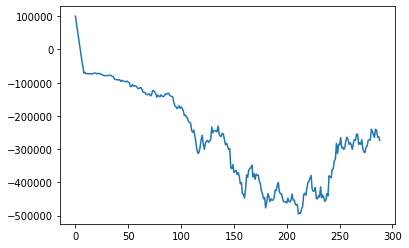

In [27]:
from matplotlib import pyplot as plt
x = range(289)
y = test_result["total assets"].tolist()
plt.plot(x, y)  
plt.show()